In [35]:
import keras
from keras.datasets import cifar100
(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()
print("The cifar database has a training set of %d examples." % len(X_train))
print("The cifar database has a test set of %d examples." % len(X_test))

The cifar database has a training set of 50000 examples.
The cifar database has a test set of 10000 examples.


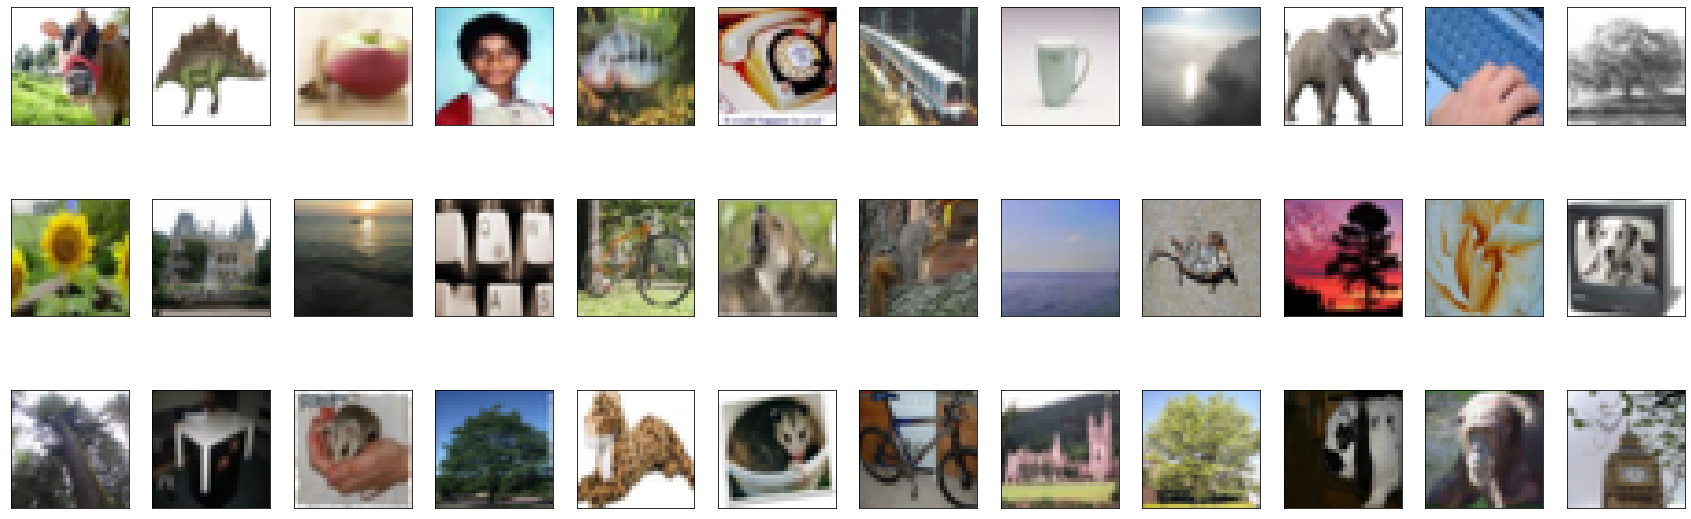

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(30,10))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [37]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
Y_test = X_test.astype('float32')/255

In [38]:
from keras.utils import np_utils   #import all training module 

# one-hot encode the labels
num_classes = len(np.unique(Y_train)) #means use the unique values to asssighn to 1 and the others to b zero
Y_train = keras.utils.to_categorical(Y_train, num_classes)#converted the clasees in the form of classification for traimg the data
Y_test = keras.utils.to_categorical(Y_test, num_classes)#converted the clasees in the form of classification for traimg the data

# break training set into training and validation sets
#first the training data starts from 5000 to 50000
#and the validation data starts from zero to 5000
#as same  these process for Xand y  
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(Y_train, Y_valid) = Y_train[5000:], Y_train[:5000]

# print shape of training set
#in the form of array 
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')


MemoryError: Unable to allocate 11.4 GiB for an array with shape (30720000, 100) and data type float32

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)         

In [18]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [34]:
from keras.callbacks import ModelCheckpoint   

batch_size = 32
epochs = 100

# train the model
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=(X_valid, Y_valid),
                    validation_steps=X_valid.shape[0] // batch_size)

NameError: name 'batch_size' is not defined